# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables known as principal components.

## Characteristics

- **Dimensionality Reduction:** Efficiently reduces the number of variables.
- **Orthogonal Transformation:** Maximizes variance and orders data along principal components.
- **Focus on Variance:** Prioritizes capturing the most variance in the data.

## Working Mechanism

1. **Standardization:** Normalize the data scale.
2. **Covariance Matrix:** Assess how variables vary from the mean with respect to each other.
3. **Eigenvalues and Eigenvectors:** Identify the directions of maximum variance.
4. **Principal Component Selection:** Choose components with the highest eigenvalues.

## Applications

- Used in fields like bioinformatics, finance, and psychology for visualization, noise reduction, and feature extraction.

## Limitations

- Reduced interpretability of transformed variables.
- Potential loss of some information due to dimensionality reduction.


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('~/Downloads/Wine.csv',names =[
    "Alcohol", 
    "Malic acid", 
    "Ash", 
    "Alcalinity of ash", 
    "Magnesium", 
    "Total phenols", 
    "Flavanoids", 
    "Nonflavanoid phenols", 
    "Proanthocyanins", 
    "Color intensity", 
    "Hue", 
    "OD280/OD315 of diluted wines", 
    "Proline","Y"
])

In [30]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Y
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
X, y= df[[
    "Alcohol", 
    "Malic acid", 
    "Ash", 
    "Alcalinity of ash", 
    "Magnesium", 
    "Total phenols", 
    "Flavanoids", 
    "Nonflavanoid phenols", 
    "Proanthocyanins", 
    "Color intensity", 
    "Hue", 
    "OD280/OD315 of diluted wines", 
    "Proline"
]], df["Y"]

In [32]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (178, 13)
np.shape(sigma) = (13,)
np.shape(Vt) = (13, 13) 



In [33]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [34]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

In [35]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.3996507  0.16770494 0.10920338 0.0683296  0.06528109 0.05148865
 0.04248671 0.02680753 0.02028839 0.01995798 0.01304329 0.01042324
 0.00533449]
per_var = [39.97 16.77 10.92  6.83  6.53  5.15  4.25  2.68  2.03  2.    1.3   1.04
  0.53] 



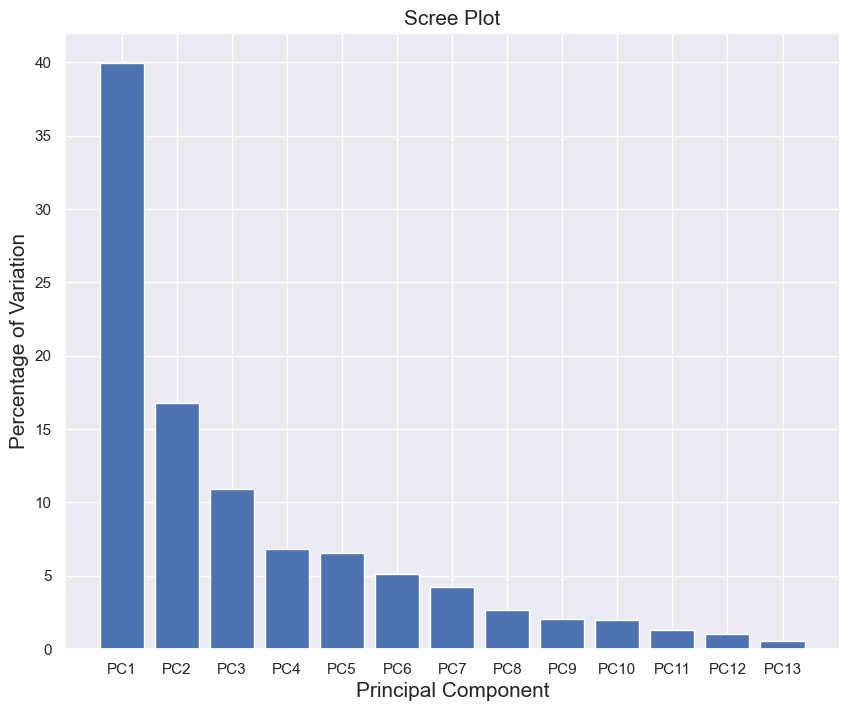

In [36]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,14)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 14), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [37]:
features = list(set(df.columns) - {"Y"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
OD280/OD315 of diluted wines,0.400618,-0.100494,0.241781,0.018240,0.222301,-0.107407,-0.367903,-0.404844,0.278716,-0.289546,0.131887,-0.301137,-0.375250
Alcohol,-0.042790,0.512530,0.222820,0.371094,0.006439,0.354651,0.159320,0.089444,-0.027556,0.131578,0.540187,-0.266302,-0.090162
Hue,0.007086,-0.272252,0.052529,0.603569,0.622288,0.081183,0.103092,0.118075,0.209387,0.098088,-0.208475,0.134374,0.159340
Proline,0.030809,-0.080731,-0.468366,0.093058,-0.046850,0.714827,-0.212779,-0.164111,-0.119993,-0.228026,-0.032345,0.253683,-0.217558
Magnesium,0.211901,-0.353198,0.283643,-0.252996,0.162204,0.342441,-0.003944,-0.001670,-0.517095,0.393786,-0.095369,-0.330512,0.038813
Color intensity,0.219323,-0.190119,-0.561312,-0.134623,0.114743,-0.149000,0.139866,0.055868,0.238366,0.510288,0.400036,-0.040365,-0.213630
Malic acid,-0.072688,-0.055755,0.371387,-0.153182,-0.290906,0.344075,-0.030977,-0.062393,0.621380,0.395211,-0.179775,0.205120,-0.075170
Proanthocyanins,0.076851,0.494084,0.083279,-0.177971,0.396754,-0.113571,-0.327953,-0.160847,-0.207813,0.314430,-0.026651,0.511229,-0.059249
Total phenols,0.274345,-0.141438,0.283809,-0.188347,0.083741,0.036136,0.566465,0.147601,-0.077932,-0.296188,0.197752,0.462347,-0.301744
Nonflavanoid phenols,0.033626,0.289871,-0.158125,-0.494162,0.413081,0.256597,0.257117,-0.044077,0.300917,-0.224784,-0.101439,-0.247122,0.358716


In [38]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184


In [39]:
projected_df = pd.concat([pca_df, df.Y], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Y
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675,1065
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390,1050
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369,1185
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160,1480
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659,740
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952,750
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851,835
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184,840
